# Tarea 6

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
figura1 = Image.open('bloque.jpg','r')
TablaA1 = Image.open('AISI304.jpg','r')
figura2_5 = Image.open('Figura2_5.png','r')
figura1.thumbnail(size=(250,250))
TablaA1.thumbnail(size=(1000,1000))
figura2_5.thumbnail(size=(500,500))
%config Completer.use_jedi = False

##### Supongamos que tenemos un bloque de acero inoxidable AISI 304 como se muestra en la figura 1.  Las paredes planas en $x=0$ y $x=L=0.3$ se mantienen a $T1= 600 \mbox{K}$ y $T2= 400 \mbox{K}$, respectivamente.

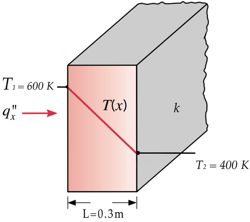

In [4]:
figura1

##### a) Examine el comportamiento de este material observado experimentalmente de la conductividad térmica como función de la temperatura, $k(T)$ a partir de la Figura 2.5 y los valores listados en el Apéndice A-Tabla A1. 

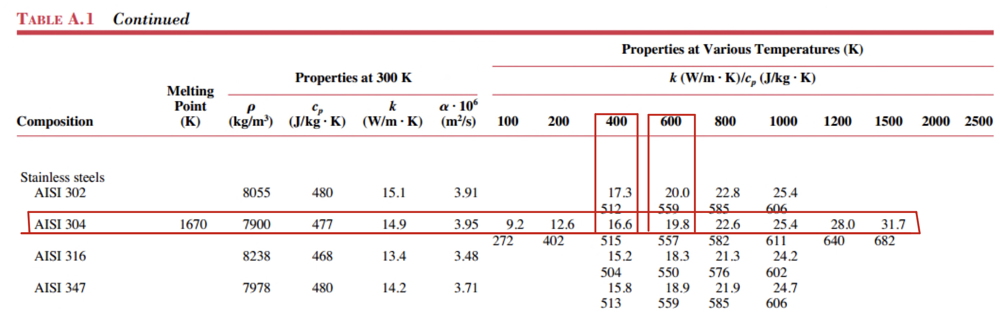

In [3]:
TablaA1

Aproxime $k(T)$ por una función lineal de la forma 

 $$ k(T) = k_0 + k_1 T $$ 

 Esto es, calcule los valores $k_0$ y $k_1$.


Una manera de encontrar $k_0$ y $k_1$ es usando la ecuación de la recta cuando conocemos dos puntos
$$k(T) = \left( \frac{k(T_2)-k(T_1)}{T_2-T_1} \right) \left(T-T_2 \right) + k(T_2) $$

Sustituimos $T_1, T_2, k(T_1), k(T_2)$ en la ecuación anterior

$$ k(T)=  \left( 0.016 \frac{W}{m K^2} T + 10.2 \frac{W}{mK} \right). $$
Otra manera de encontrar $k_0$ y $k_1$ es graficando los valores de las conductividades térmicas $k$ para los valores de las temperaturas $T$ que se muestran en la Tabla A.1

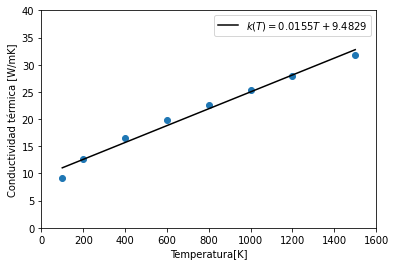

In [8]:
#creamos un archivo con los valores de la Tabla A.1 para AISI 304
data = {'T':[100,200,400,600,800,1000,1200,1500],'k':[9.2,12.6,16.6,19.8,22.6,25.4,28.0,31.7]}  
dat = pd.DataFrame(data, columns = ['T','k'])
#graficamos T(k) y deberiamos obtener una figura similar a la figura 2.5
plt.plot(dat['T'],dat['k'],'o')
k1,k0 = np.polyfit(dat['T'],dat['k'] , 1) #hace un ajuste polinomial por mínimos cuadrados
plt.plot(dat['T'],k1*dat['T']+k0,color='black',label="$k(T)={}T+{}$".format(k1.round(4),k0.round(4)))
plt.ylabel("Conductividad térmica [W/mK]")
plt.xlabel("Temperatura[K]")
plt.legend()
plt.xlim(0,1600)
plt.ylim(0,40)
plt.show()

In [6]:
"Los valores son k1={} W/mK y k0={} w/mK".format(k1.round(5),k0.round(5))

'Los valores son k1=0.01552 W/mK y k0=9.48289 w/mK'

#####  b) Considere que la conductividad térmica es constante e igual al promedio de la conductividad entre los valores entre T1= 600 K y T2= 400 K. Esto es 

##### $$k = \frac{k(T=600 \mbox{K}+k(T=400 \mbox{K})}{2}$$

##### Obtenga el campo de temperaturas $T(x)$, $0 < x < L$ y el flujo de calor por unidad de área $q_x^"(x)$. Sugerencia: Leer la sección 3.1.1.

Solución:

Cuando la conductividad térmica $k$  no depende de la distancia $x$, la ecuación de calor es

$$\frac{d^2 T}{dx^2}=0.$$

La solución de esta ecuación es una distribución lineal con dos constantes de integración que son determinadas evaluando la función en las posiciones en $x=0$ y $x=L$. El resultado es

$$T(x)= \frac{T_2-T_1}{L}x + T_1$$


El flujo de calor por unidad de área es

$$q_x^"= -k \frac{dT}{dx} = k \frac{T_1-T_2}{L}x $$ 

In [53]:
#dat.k[dat['T']==400]
#dat.k[dat['T']==600]

In [7]:
#Calculamos kprom, T(x), qx"

T1 = 600
T2 = 400
L  = 0.3
x  = np.arange(0,L,0.01)
kp = (16.6+19.8)/2 

def Tx(T1,T2,L,x):
    return (x/L)*(T2-T1)+T1


def qx(T1,T2,L,kp):
    return (kp/L)*(T1-T2)   

print("La distribución de temperaturas es T(x)= -666.6x+600 ")
print('El flujo de calor por unidad de área es qx" = {} W'.format(round(qx(T1,T2,L,kp),2)))

La distribución de temperaturas es T(x)= -666.6x+600 
El flujo de calor por unidad de área es qx" = 12133.33 W


##### c) Considere que la conductividad térmica es una función lineal de la temperatura $k(T)=k_0 + k_1T$ y encuentre la distribución de temperaturas $T(x)$ y el flujo de calor $q_x$.

Supongamos que $k(T)= k_0 + k_1 T$, la ecuación de calor toma la forma

$$\frac{d}{dx}\left( \left( k_0 + k_1 T \right) \frac{d}{dx} \right)=0, $$

cuya solución es

$$T^2 + 2 \frac{k_0}{k_1}T- \frac{2}{k_1}(C_0 x + C_1)=0,$$

o bien, resolviendo para $T$

$$T = \frac{-k_0}{k_1}+ \sqrt{\frac{{k_0}^2}{{k_1}^2}+\frac{2}{k_1}(C_0 x+C_1)}.$$

Evaluamos las condiciones a la frontera $T(x=0)=T_1$ y $T(x=L)=T_2$ y obtenemos $C_0$ y $C_1$

$$C_0 = \frac{1}{L} \left[\frac{k_1}{2}(T_2-T_1)(T_2+T_1)+ k_0 (T_2-T_1) \right],
\quad C_1 = \frac{k_1}{2}T_1^2+k_0 T_1$$

El flujo de calor por unidad de área es

$$q_x^{''} = -k \frac{dT}{dx} = -C_0$$

In [8]:
#Calculamos C0, C1 y T

T1 = 600
T2 = 400
L  = 0.3
x  = np.arange(0,L,0.01)

def Tx_k(T1,T2,L,x,k0,k1):
    c0 = (1/L)*((k1/2)*((T2-T1)*(T2+T1))+k0*(T2-T1))
    c1 = (k1/2)*(T1**2) + k0*T1
    T  = (-k0/k1)+ np.sqrt((k0/k1)**2 + (2/k1)*(c0*x+c1))
    return T

def qx_k(T1,T2,L,k0,k1):
    c0 = (1/L)*((k1/2)*((T2-T1)*(T2+T1))+k0*(T2-T1))
    return -c0

##### d) Concluya si es razonable o no ignorar la dependencia de la conductividad térmica  en función de la temperatura $k(T)$ bajo las condiciones examinadas 

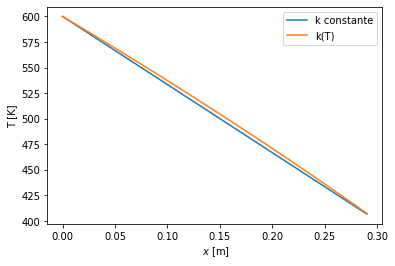

In [9]:
fig, ax = plt.subplots()

ax.plot(x,Tx(T1,T2,L,x),label="k constante")
ax.plot(x,Tx_k(T1,T2,L,x,k0,k1),label="k(T)")
ax.legend()
ax.set_xlabel(" $x$ [m]")
ax.set_ylabel("T [K]")
plt.show()

In [10]:
print('El flujo de calor por unidad de área cuando k(T) es qx" = {} W'.format(round(qx_k(T1,T2,L,k0,k1),2)))

El flujo de calor por unidad de área cuando k(T) es qx" = 11496.46 W


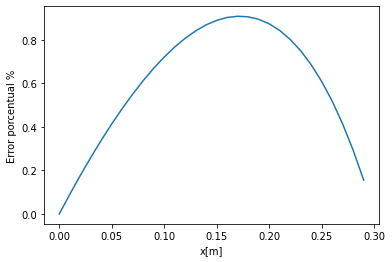

In [11]:
plt.plot(x,((Tx_k(T1,T2,L,x,k0,k1)-Tx(T1,T2,L,x))/Tx_k(T1,T2,L,x,k0,k1))*100)
plt.xlabel("x[m]")
plt.ylabel("Error porcentual %")
plt.show()